In [46]:
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
import lstm, time #helper libraries

import urllib.parse
import pandas as pd
from pandas import datetime
import datetime
import math, time

In [85]:
def get_stock_data(stock_name, normalized=0):
    #url = 'http://chart.finance.yahoo.com/table.csv?s=%s&a=11&b=15&c=2011&d=29&e=10&f=2016&g=d&ignore=.csv' % stock_name
    #&startdate=Jan+1%2C+2010
    #http://www.google.com/finance/historical?q=NASDAQ%3ATSLA&ei=u-lHWfGPNNWIsgHHqIqICw&output=csv&startdate=Jan+1%2C+2010
    url="http://www.google.com/finance/historical?q=%s&ei=u-lHWfGPNNWIsgHHqIqICw&output=csv&startdate=%s" %(stock_name,start_date)
    print(url)
    #col_names = ['Date','Open','High','Low','Close','Volume','Adj Close']
    col_names = ['Date','Open','High','Low','Close','Volume']
    stocks = pd.read_csv(url, header=0, names=col_names) 
    df = pd.DataFrame(stocks)
    date_split = df['Date'].str.split('-').str
    df['Year'], df['Month'], df['Day'] = date_split
    #df["Volume"] = df["Volume"] 
    #df["Close"] = df["Close"] 
    #df["High"] = df["High"] 
    #df.drop(df.columns[[0,3,5,6, 7,8,9]], axis=1, inplace=True)
    #df.drop(df.columns[[0,3,5,6, 7,8]], axis=1, inplace=True)
    del df['Year']
    del df['Volume']
    del df['High']
    del df['Low']
    del df['Month']
    del df['Day']
    del df['Date']
    del df['Open']
    df.reindex(index=df.index[::-1])
    return df

start_date = "Jan+1%2C+2010"
stock_name = urllib.parse.quote('NASDAQ:TSLA')
df = get_stock_data(stock_name,0)
df.head()

today = datetime.date.today()
file_name = stock_name + '_stock_%s.csv' % today
df.to_csv(file_name,index=False)


with open(file_name, 'r') as fin:
    data = fin.read().splitlines(True)
with open(file_name, 'w') as fout:
    fout.writelines(data[1:])


http://www.google.com/finance/historical?q=NASDAQ%3ATSLA&ei=u-lHWfGPNNWIsgHHqIqICw&output=csv&startdate=Jan+1%2C+2010


In [86]:
#Step 1 Load Data
X_train, y_train, X_test, y_test = lstm.load_data(file_name, 50, True)

In [87]:
#Step 2 Build Model
model = Sequential()

model.add(LSTM(
    input_dim=1,
    output_dim=50,
    return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(
    100,
    return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(
    output_dim=1))
model.add(Activation('linear'))

start = time.time()
model.compile(loss='mse', optimizer='rmsprop')
print('compilation time : ', time.time() - start)

compilation time :  0.028047561645507812


In [88]:
#Step 3 Train the model
model.fit(
    X_train,
    y_train,
    batch_size=512,
    nb_epoch=1,
    validation_split=0.05)

Train on 1461 samples, validate on 77 samples
Epoch 1/1
1461/1461 [==============================] - 6s - loss: 0.0272 - val_loss: 0.0054


yo


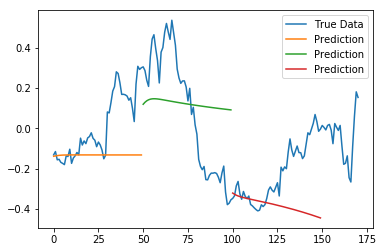

In [89]:
#Step 4 - Plot the predictions!
predictions = lstm.predict_sequences_multiple(model, X_test, 50, 50)
lstm.plot_results_multiple(predictions, y_test, 50)